In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
  

In [4]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob

In [5]:
data = pd.read_csv('Terraria.csv')

In [6]:
print(data['review_text'].isnull().sum())

126


In [7]:
data = data.dropna(subset = ['review_text'])

In [8]:
data['review_text'] = data['review_text'].astype(str)

In [9]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token not in stopwords.words('english')]
    return ' '.join(tokens)

In [10]:
data['processed_text'] = data['review_text'].apply(preprocess_text)

In [11]:
data['sentiment'] = data['review_text'].apply(lambda x: 1 if TextBlob(x).sentiment.polarity > 0 else 0)

In [12]:
x = data['processed_text']
t = data['sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, t, test_size=0.2, random_state=42)

In [13]:
vectorizer = TfidfVectorizer()
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

In [14]:
model = SVC(kernel='linear')
model.fit(x_train_tfidf, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = model.predict(x_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", confusion)

Accuracy: 0.9081518210259135
Precision: 0.9375593747301149
Recall: 0.9287364188553341
F1-score: 0.9331270414302906
Confusion Matrix:
 [[ 4529   723]
 [  833 10856]]


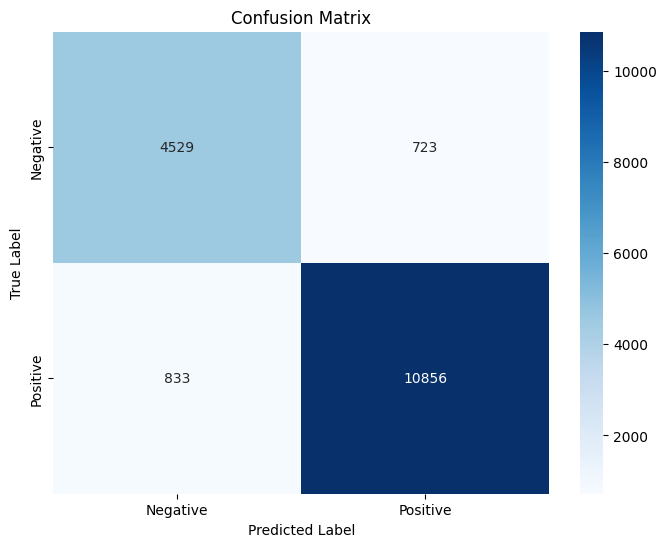

In [18]:
plt.figure(figsize=(8, 6))  
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Negative", "Positive"], 
            yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()